In [1]:
# Importing te libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Importing the training set
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values


In [3]:
# Feature Scaling
# Normalisation is preferred more over standardisation for feature scaling your data when using rnns
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


In [4]:
# Creating a data structure with 60 timestamps and 1 output
# 60 was found to be most optimum
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [5]:
# Reshaping
# Input shape
# 3D tensor with shape (batch_size, timesteps, input_dim). 
# input_dim means number of indicators which is just opening price in this case. hence 1
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [6]:
# building the RNN

# Importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initializing the RNN
regressor = Sequential()

Using TensorFlow backend.


In [7]:
# Adding the first LSTM Layer and some dropout regularization
regressor.add(LSTM(units = 50,
                   return_sequences = True,  #set it to true as we are building a stacked lstm(several layers) until the last layer(where its value will be False)
                   input_shape = (X_train.shape[1], 1) # need to specify input_shape for only first layer. second layer onwards, as it is automatically recognized
                   ))
regressor.add(Dropout(rate = 0.2))


Instructions for updating:
Colocations handled automatically by placer.


In [8]:
# Adding the second LSTM layer with some Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

# Adding the third LSTM layer with some Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

# Adding the fourth LSTM layer with some Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))


In [9]:
# Adding the output layer
regressor.add(Dense(units = 1)) 


In [10]:
# Compiling the RNN
# rmsprop optimizer is usually a good choice for rnns
# loss for regression problems is mse whereas for classification
# problems is binary_crossentropy
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')



In [11]:
# Fitting the rnn to the training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0446
Epoch 2/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0063
Epoch 3/100
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0050
Epoch 6/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0052
Epoch 7/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0050
Epoch 8/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0042
Epoch 9/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0047
Epoch 10/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0046
Epoch 11/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0043
Epoch 12/100
1198/1198 [==

1198/1198 [==============================] - 3s 3ms/step - loss: 0.0018
Epoch 95/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0018
Epoch 96/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0016A: 0s - los
Epoch 97/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0016
Epoch 99/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0016


In [12]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

# getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0 ) # for vertical concatenation: axis = 0
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80): # test set only has 20 values
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


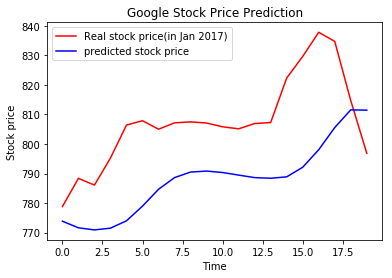

In [15]:
# Visualizing the results
plt.plot(real_stock_price, color = 'red', label = "Real stock price(in Jan 2017)" )
plt.plot(predicted_stock_price, color = 'blue', label = "predicted stock price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock price")
plt.legend()
plt.show()


